In [9]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import io

DAILY_DEMO_JSON = 'data/dailyDemo2.json'
DAILY_DATA_JSON = 'data/dailyData2.json'
DAILY_TREND_JSON = 'data/dailyTrend2.json'



updated


{'statusCode': 200, 'body': '"Hello from Lambda!"'}

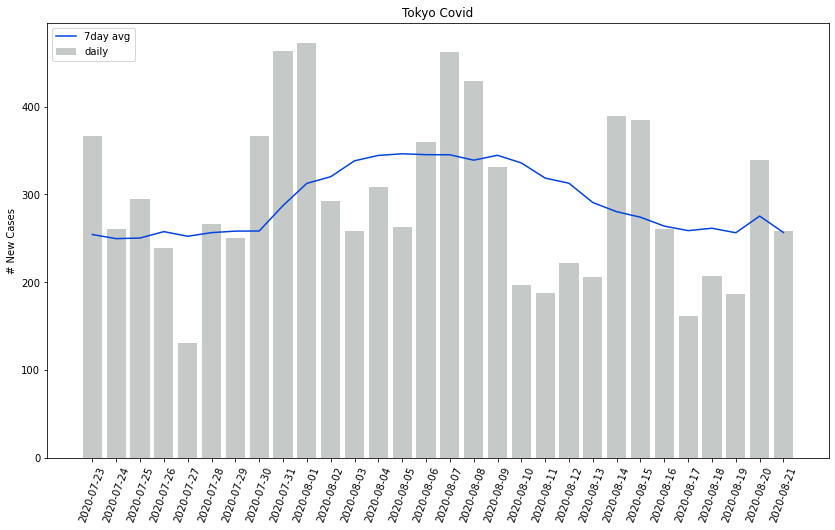

In [40]:
import boto3

def lambda_handler(event, context):
    data = []
    with open(DAILY_TREND_JSON) as json_file:
        data = json.load(json_file)
    
    labels = list(map(lambda x: x['name'], data))
    sumtokyo = list(map(lambda x: x['Tokyo'], data))
    avg7d = list(map(lambda x: x['7dayAvg'], data))
    
    #plotting overlays fun 
    fig,ax1 = plt.subplots(figsize=(14, 8)) 
    plt.title('Tokyo Covid')
    plt.xticks(rotation=70)
    
    ax1.set_ylabel('# New Cases')  # we already handled the x-label with ax1
    ax1.bar(labels[-30:], sumtokyo[-30:], color='xkcd:silver', label='daily')
    ax1.plot(labels[-30:], avg7d[-30:], color='xkcd:blue', label='7day avg')
   # ax1.plot(avg30d.tail(30).index, avg30d.tail(30), color='xkcd:red', label='30day avg')
    ax1.legend(loc='upper left')

    buf = io.BytesIO()
    fig.savefig(buf, format='png')

    
    bucket = "tokyocovid.foostack.org"
    s3_resource = boto3.resource('s3')
    s3_resource.Object(bucket, 'chart.png').put(Body=buf.getvalue())
    
    
    #fig.savefig('newchart.png')  # does it overwrite old ?  i think so -- where does this write in AWS Lambda ?
    
    # TODO implement
    return {
        'statusCode': 200,
        'body': json.dumps('Hello from Lambda!')
    }
print('updated')
lambda_handler(None, None)

In [28]:
print('foo me')

lambda_handler(None, None)


foo me
[{'name': '2020-01-24', 'Tokyo': 1, '7dayAvg': None}, {'name': '2020-01-25', 'Tokyo': 1, '7dayAvg': None}, {'name': '2020-01-30', 'Tokyo': 1, '7dayAvg': None}, {'name': '2020-02-13', 'Tokyo': 1, '7dayAvg': None}, {'name': '2020-02-14', 'Tokyo': 2, '7dayAvg': None}, {'name': '2020-02-15', 'Tokyo': 8, '7dayAvg': None}, {'name': '2020-02-16', 'Tokyo': 5, '7dayAvg': 2.7142857143}, {'name': '2020-02-18', 'Tokyo': 3, '7dayAvg': 3.0}, {'name': '2020-02-19', 'Tokyo': 3, '7dayAvg': 3.2857142857}, {'name': '2020-02-21', 'Tokyo': 3, '7dayAvg': 3.5714285714}, {'name': '2020-02-22', 'Tokyo': 1, '7dayAvg': 3.5714285714}, {'name': '2020-02-24', 'Tokyo': 3, '7dayAvg': 3.7142857143}, {'name': '2020-02-26', 'Tokyo': 3, '7dayAvg': 3.0}, {'name': '2020-02-27', 'Tokyo': 1, '7dayAvg': 2.4285714286}, {'name': '2020-02-29', 'Tokyo': 1, '7dayAvg': 2.1428571429}, {'name': '2020-03-01', 'Tokyo': 2, '7dayAvg': 2.0}, {'name': '2020-03-03', 'Tokyo': 1, '7dayAvg': 1.7142857143}, {'name': '2020-03-04', 'Tokyo'

NameError: name 'tokyoBase' is not defined